In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats
from numpy import median
sns.set(style='darkgrid')

In [30]:
path = 'E:/'
rest = pd.read_csv('/datasets/rest_data.csv')
rest.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [31]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [32]:
rest.drop(['id'], axis=1).duplicated().sum()

82

In [33]:
c = ['object_name', 'chain', 'object_type', 'address', 'number']
rest_dupl = rest[rest[c].duplicated(keep=False)]
rest_dupl.head(10)

,id,object_name,chain,object_type,address,number
2374,28603,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2869,25031,LALTRO BOSCO,нет,ресторан,"город Москва, улица Петровка, дом 10",145
3480,20913,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4430,23741,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4536,23381,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
4537,23391,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5058,20019,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20


Если посмотреть без столбца "id", то можно увидеть 82 дублирующие строки. Как так получилось, мы не знаем. Возможно задублировалось при сохранении, может "человеческий фактор" сыграл свою роль. Все эти вопросы надо задавать тем, кто предоставляет данные. Тем не менее, 82 строки это все лишь 0,5% от общего числа строк и какого-либо влияния на наше исследование не сможет оказать.  
Заменим данные в столбце Chain на логические. И проверим на корректность данных в столбце object_type.


In [34]:
def change_logic(x):
    if x=='да':
        return True
    else:
        return False
rest['chain'] = rest['chain'].apply(change_logic)

In [35]:
print('Проверим корректность типов объектов:\n{}'.format(rest['object_type'].value_counts()))

Проверим корректность типов объектов:
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64


Данные подготовлены, можем приступить к анализу.

# Анализ данных

## Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [36]:
object_types = rest.groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
object_types['percent'] = (object_types['object_name']/object_types['object_name'].sum()*100).round(1).astype('str') + '%'
fig = px.bar(object_types, y='object_name', x='object_type', text='object_name', color='object_type', width=900, height=550)
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Соотношение видов объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")
fig.update_traces(textposition='outside')
for trace, percent in zip(fig.data,object_types['percent']) :
    trace.name = trace.name.split('=')[1] + ' (' + percent+ ')'
fig.show()

##### Итак, по количеству лидируют кафе 6099 шт, затем столовые, рестораны и предприятия быстрого обслуживания.

## Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [37]:
fig = go.Figure(data=go.Pie(labels=rest['chain'].value_counts().reset_index()['index'], values=rest['chain'].value_counts()))
fig.update_layout(
    title={
        'text':'Соотношение сетевых и несетевых заведений по количеству',
        'y':0.9,
        'x':0.48})
for trace in fig.data:
    trace['labels']=['Несетевые', 'Сетевые']
fig.show()

##### Сетевых заведений всего 20% от общего количества.

## Для какого вида объекта общественного питания характерно сетевое распространение?

In [38]:
object_types = rest.groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
chain_object_types = rest[rest['chain']==True].groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
chain_object_types = chain_object_types.merge(object_types[['object_type', 'object_name']], 
                                              left_on='object_type', right_on='object_type')
chain_object_types.columns=['object_type', 'chain_objects', 'all_objects']
chain_object_types['percent'] = (chain_object_types['chain_objects'] / chain_object_types['chain_objects'].sum()*100).round(1).astype('str')+'%'
chain_object_types['percent_of_type'] = (chain_object_types['chain_objects'] / chain_object_types['all_objects']*100).round(2)
chain_object_types['percent_of_type_text'] = chain_object_types['percent_of_type'].astype('str')+'%'

In [39]:
fig = px.histogram(rest, x="object_type", color="chain")
fig.update_layout(title_text='Сетевые / несетевые',
                  yaxis=dict(
                            title='Количество объектов',
                            titlefont_size=16,
                            tickfont_size=14,
                             )
                 )
fig.show()

In [40]:
rest.groupby('object_type')['chain'].apply(
    lambda x:sum((x == True)/((sum(x==True)+sum(x==False))))*100).reset_index().sort_values(
    'chain',ascending = False).style.bar(subset=['chain'], color='magenta')

,object_type,chain
6,предприятие быстрого обслуживания,41.1336
5,магазин (отдел кулинарии),28.5714
7,ресторан,23.8074
3,кафе,22.889
2,закусочная,15.5556
4,кафетерий,13.0653
0,бар,4.32243
1,буфет,1.88034
8,столовая,0.115964


##### Сетевое распространение характерно для кафе, ресторанов и предприятий быстрого обслуживания. При этом к сетевым относятся 41% предприятий быстрого обслуживания, 29% отделов кулинарии в магазинах и 24% ресторанов. Сетевые структуры не любят столовые и буфеты, менее 2%.

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [41]:
mean_number_type = rest.groupby('object_type')['number'].mean().reset_index().sort_values('number',ascending=False)

In [42]:
fig = go.Figure([go.Bar(x=mean_number_type['object_type'], y=mean_number_type['number'],text = round(mean_number_type['number']),
                        textposition = 'auto')])
fig.update_layout(title_text='Среднее количество посадочных мест'
                  
                 )
fig.show()

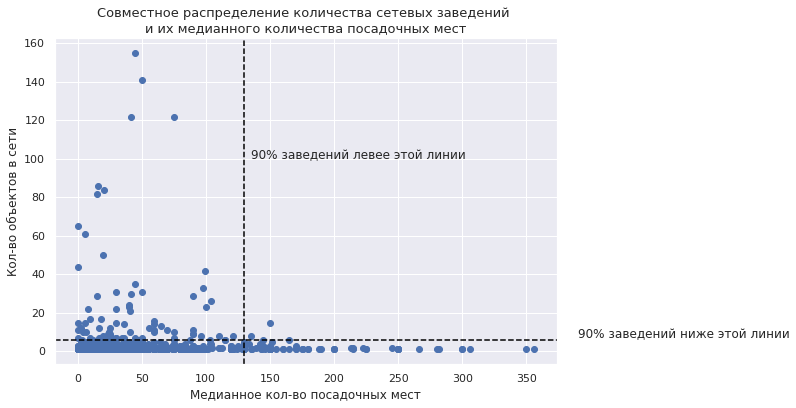

In [43]:
chain_objects = rest[rest['chain']==True].groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']
plt.figure(figsize=(9,6))
plt.scatter(chain_objects['median_number'], chain_objects['objects'])
plt.xlabel('Медианное кол-во посадочных мест')
plt.ylabel('Кол-во объектов в сети')
plt.title('Совместное распределение количества сетевых заведений \nи их медианного количества посадочных мест', fontsize=13)
plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(chain_objects['median_number'], 90), linestyle='--', color='black')
plt.text(390,7, '90% заведений ниже этой линии')
plt.text(135,100, '90% заведений левее этой линии')
plt.show()

In [44]:
alpha=0.05

results = stats.ttest_ind(chain_objects['median_number'], rest[rest['chain']==False]['number'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Нулевая гипотеза: Разница между кол-вом посадочных мест в сетевых и несетевых объектах СТАТИСТИЧЕСКИ ЗНАЧИМА')
else:
    print('Альтернативная гипотеза: Разницы между кол-вом посадочных мест в сетевых и несетевых объектах нет')
chain_objects
np.percentile(chain_objects['median_number'], 90)

P-value: 0.47795311248080785
Альтернативная гипотеза: Разницы между кол-вом посадочных мест в сетевых и несетевых объектах нет


130.0

## Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [45]:
number_of_seats = rest.pivot_table(index='object_type', values='number', aggfunc='mean').sort_values(by='number', ascending=False).reset_index()
number_of_seats.columns=['Тип объекта', 'Кол-во посадочных мест']
print('5 лидеров по количеству посадочных мест:\n\n', number_of_seats.head())

fig = px.bar(number_of_seats, y='Тип объекта', x='Кол-во посадочных мест', orientation='h',
             text = 'Кол-во посадочных мест', color='Тип объекта', width = 1100, height = 550)
fig.update_layout(title={'text':'Среднее кол-во посадочных мест по видам объектов',
                        'y':0.001})
fig.show()

5 лидеров по количеству посадочных мест:

   Тип объекта  Кол-во посадочных мест
0    столовая              130.246618
1    ресторан               96.834136
2       буфет               51.129915
3         бар               43.494159
4        кафе               39.716019


##### Лидеры по количеству посадочных мест - столовые и рестораны.

## Выделите в отдельный столбец информацию об улице из столбца

In [46]:
street_types = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека']
def street_finder(address):
    for address_part in address.split(', '):
        for street_type in street_types:
            if address_part.lower().find(street_type)!= -1:
                return address_part

rest['street'] = rest['address'].apply(street_finder)
rest_with_streets = rest[~(rest['street'].isnull())]

rest_with_streets.sample(10)

,id,object_name,chain,object_type,address,number,street
3298,21378,Школа 435,False,столовая,"город Москва, улица Госпитальный Вал, дом 5, с...",80,улица Госпитальный Вал
14304,214013,ШУ-ШУ,False,ресторан,"город Москва, Азовская улица, дом 24, корпус 3",50,Азовская улица
4331,27445,СТОЛОВАЯ КОЛОРИТ ШКОЛА 287,False,столовая,"город Москва, улица Годовикова, дом 16А",240,улица Годовикова
1231,22072,Траттория Пане Олио,False,кафе,"город Москва, улица Тимура Фрунзе, дом 22",60,улица Тимура Фрунзе
5073,19696,ОДИССЕЙ+,False,кафе,"город Москва, улица Барклая, дом 8",35,улица Барклая
9842,170356,Кренделькофф,False,кафе,"город Москва, Ленинградский проспект, дом 78, ...",2,Ленинградский проспект
12666,194797,Пекарня,False,закусочная,"город Москва, Липецкая улица, дом 32",0,Липецкая улица
7185,22555,Кафе «Джон Булл Паб»,False,кафе,"город Москва, улица Красная Пресня, дом 25, ст...",100,улица Красная Пресня
548,25720,Кафе Хинкальная,False,кафе,"город Москва, Ленинградский проспект, дом 33, ...",28,Ленинградский проспект
11611,181110,Кафе «Каррифан»,False,кафе,"город Москва, Варшавское шоссе, дом 9, строени...",7,Варшавское шоссе


#### После выделения улиц из адреса, у нас осталось 382 адреса, в которых не указана улица. Как правило, это поселки и другие загородные адреса. Мы далее не будем использовать такие строки в данных. Я сохранил датафрейм только с явными названиями для дальнейшей работы с улицами.

## Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [47]:
top_streets = rest_with_streets.groupby('street', as_index=False).agg({'object_name':'count'})
top_streets.columns = ['street', 'objects']
top_streets = top_streets.sort_values(by='objects', ascending = False)
top10_streets = top_streets.head(10)

fig = px.bar(top10_streets, x='street', y='objects', 
             color='street', width = 900, height = 550, text='objects')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Топ-10 улиц с наибольшим количеством заведений',
    xaxis_title="Улица",
    yaxis_title="Количество заведений")
fig.show()

In [48]:
district = pd.read_csv("http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv")

In [49]:
top10_streets_merged = top10_streets.merge(district[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')
streets = pd.DataFrame(data=top10_streets_merged['street'].unique(), columns=['street'])
def areas(row, data):
    result = data[data['street']==row['street']]['area'].to_list()
    return result
top10_streets['areas'] = top10_streets.apply(areas, args=[top10_streets_merged], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
for street, areas in zip(top10_streets['street'], top10_streets['areas']):
    print('{} находится в:'.format(street))   
    for area in areas:
        numeric=1
        print('-', area)
    print('')

проспект Мира находится в:
- Алексеевский район
- Ярославский Район
- Район Марьина роща
- Останкинский район
- Район Ростокино
- Район Свиблово
- Мещанский район

Профсоюзная улица находится в:
- Академический район
- Район Черемушки
- Район Ясенево
- Район Коньково
- Обручевский район
- Район Теплый Стан

Ленинградский проспект находится в:
- Район Аэропорт
- Район Беговой
- Хорошевский район
- Район Сокол

Пресненская набережная находится в:
- Пресненский район

Варшавское шоссе находится в:
- Район Чертаново Центральное
- Район Чертаново Северное
- Район Чертаново Южное
- Донской район
- Район Нагатино-Садовники
- Нагорный район
- Район Северное Бутово
- Район Южное Бутово

Ленинский проспект находится в:
- Район Проспект Вернадского
- Район Тропарево-Никулино
- Донской район
- Район Гагаринский
- Ломоносовский район
- Обручевский район
- Район Теплый Стан
- Район Якиманка

проспект Вернадского находится в:
- Район Проспект Вернадского
- Район Раменки
- Район Тропарево-Никулино
- Р

## Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [51]:
one_object_streets = top_streets[top_streets['objects']==1]
print('Всего улиц с 1 объектом общественного питания: {}, что составляет {:.1%} от всего кол-ва улиц с объектами общественного питания'\
      .format(len(one_object_streets), (len(one_object_streets)/len(top_streets))))

Всего улиц с 1 объектом общественного питания: 551, что составляет 28.9% от всего кол-ва улиц с объектами общественного питания


In [52]:
one_object_streets_merged = one_object_streets.merge(district[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')

def areas(row, data):
    result = data[data['street']==row['street']]['area'].to_list()
    return result
one_object_streets['areas'] = one_object_streets.apply(areas, args=[one_object_streets_merged], axis=1)
print('\n')

print('Районы, в которых находятся улицы с 1 объектом общественного питания:')
for area in one_object_streets_merged['area'].sort_values().unique():
    print('-', area)



Районы, в которых находятся улицы с 1 объектом общественного питания:
- Алексеевский район
- Алтуфьевский район
- Бабушкинский район
- Басманный район
- Бескудниковский Район
- Бутырский район
- Войковский Район
- Головинский район
- Даниловский район
- Дмитровский район
- Донской район
- Красносельский район
- Лосиноостровский район
- Мещанский район
- Можайский Район
- Молжаниновский район
- Нагорный район
- Нижегородский район
- Обручевский район
- Останкинский район
- Панфиловский район
- Пресненский район
- Район Арбат
- Район Аэропорт
- Район Беговой
- Район Бирюлево Восточное
- Район Богородское
- Район Внуково
- Район Восточное Измайлово
- Район Восточный
- Район Выхино-Жулебино
- Район Гагаринский
- Район Гольяново
- Район Дорогомилово
- Район Замоскворечье
- Район Западное Дегунино
- Район Зюзино
- Район Ивановское
- Район Измайлово
- Район Коньково
- Район Коптево
- Район Косино-Ухтомский
- Район Котловка
- Район Крюково
- Район Кузьминки
- Район Кунцево
- Район Куркино
- 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

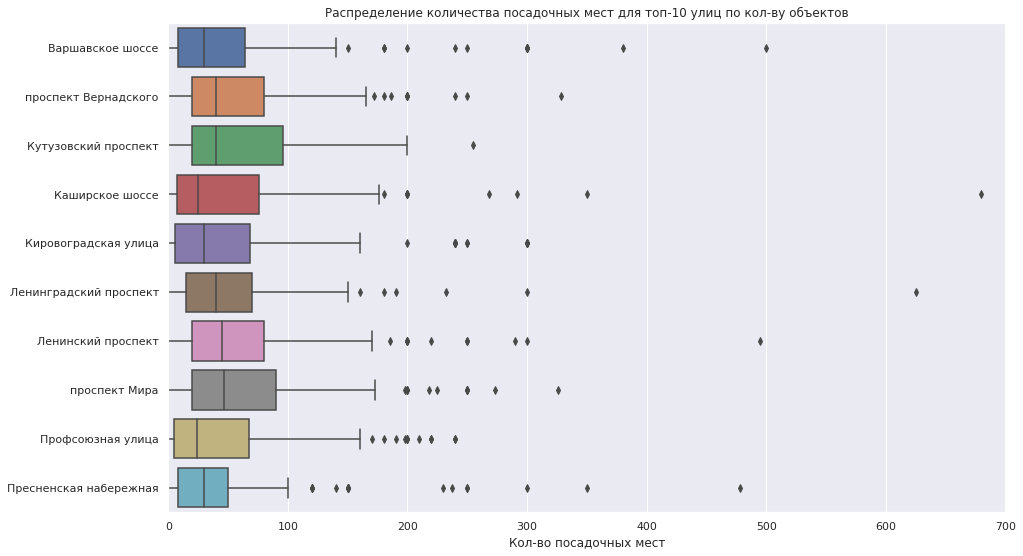

Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 38.5
Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: 40.0


In [53]:
top10_streets_list = top10_streets['street'].to_list()
top10_streets_data = rest.query('street in @top10_streets_list')


top10_streets_data['number'].median()
rest['number'].median()
plt.figure(figsize=(15,9))
plt.xlim(0,700)
sns.boxplot(data=top10_streets_data, x='number', y='street')
plt.title('Распределение количества посадочных мест для топ-10 улиц по кол-ву объектов')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

print('Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: {}'.format(top10_streets_data['number'].median()))
print('Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: {}'\
.format(rest.query('street not in @top10_streets_list')['number'].median()))

# Вывод.

Мы выяснили, что наибольшее количество типов объектов общественного притания составляют кафе 40%, столовые 17%, рестораны 15%, фастфуды 12,5% и бары 6%.

При этом сетевых заведений лишь 20% от общего количества, остальные - несетевые.
Сетевое распространение характерно для кафе, ресторанов и предприятий быстрого обслуживания. При этом к сетевым относятся 41% предприятий быстрого обслуживания, 29% отделов кулинарии в магазинах и 24% ресторанов. Сетевые структуры не любят столовые и буфеты, менее 2%. Как правило для сетевых заведений характерно - мало заведений с большим количеством посадочных мест. В 90% сетей не больше 130 посадочных мест и 6 заведений в среднем.

Среднее количество посадочных мест по типам объектов общественного питания:

столовая 103
ресторан 80
бар 35
буфет 32
кафе 30
Как мы видим, именно у типов объекта СТОЛОВАЯ наибольшее количество посадочных мест - в среднем 103!

Топ-10 улиц с наибольшим количеством заведений:

проспект Мира 204
Профсоюзная улица 183
Ленинградский проспект 173
Пресненская набережная 167
Варшавское шоссе 165
Ленинский проспект 148
проспект Вернадского 132
Кутузовский проспект 114
Каширское шоссе 112
Кировоградская улица 110
Так же у нас есть список районов, в которых располагаются топ-10 улиц по кол-ву объектов общественного питания. Всего улиц с одним объектом общественного питания: 551, что составляет 28.9% от всего кол-ва улиц с объектами общественного питания в Москве. Список районов мы так же можем предоставить, в которых располагаются данные улицы.

Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 38.5 Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: 40.0

Рекомендации: Считаю, что для чего-то определенного, нужно провести более масштабное исследование. Например, было бы неплохо посмотреть улицы с малым количеством заведений, или районы с большим количеством БЦ, ВУЗов вне топ10 улиц.

Но определенно можно сказать, что надо обратить внимание на кафе (как на популярное заведение в сфере общепита), расположить его на топ10 улице и использовать около 30 посадочных мест.

Презентация: https://yadi.sk/i/sUiQP_H6YIqH9Q